In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

%matplotlib inline

In [103]:
df = pd.read_csv("C:/Users/wparry/OneDrive - True Value Company/projects/python/train.csv")
test_data = pd.read_csv("C:/Users/wparry/OneDrive - True Value Company/projects/python/test.csv")
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df["SibSp"].value_counts(), df["Parch"].value_counts(), df["Cabin"].value_counts(), df["Embarked"].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64, 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: Parch, dtype: int64, B96 B98        4
 C23 C25 C27    4
 G6             4
 E101           3
 C22 C26        3
 F33            3
 D              3
 F2             3
 B58 B60        2
 D35            2
 D36            2
 D17            2
 F4             2
 E8             2
 C78            2
 C2             2
 B51 B53 B55    2
 C93            2
 C125           2
 C124           2
 D33            2
 B5             2
 F G73          2
 C52            2
 B77            2
 B22            2
 C126           2
 E33            2
 D20            2
 E24            2
               ..
 A32            1
 D7             1
 A19            1
 C7             1
 D45            1
 B42            1
 A23            1
 C99            1
 C106           1
 F G63          1
 B78            1
 E77            1
 D56            1
 C54          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.loc[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C7F4755F8>,
      dtype=object)

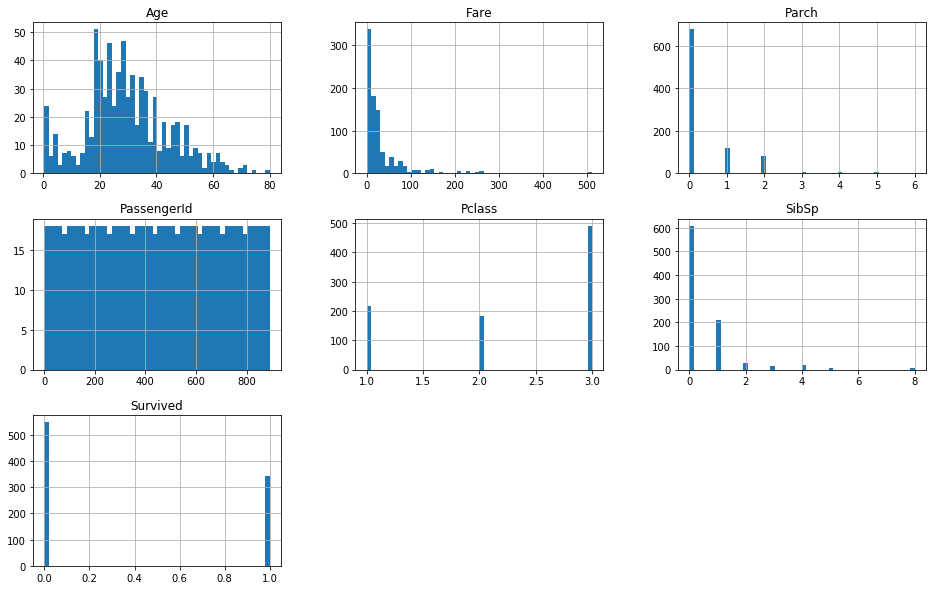

In [7]:
df.hist(bins=50, figsize=(16,10))

In [117]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
mean_age = math.ceil(X_train["Age"].mean())
mode_embarked = X_train["Embarked"].mode()[0]
mean_fare = X_train["Fare"].mean()
X_train["Age"] = X_train["Age"].fillna(mean_age)
X_train["Cabin"] = X_train["Cabin"].str[:1]
X_train["Cabin"] = X_train["Cabin"].fillna("Z")
X_train["Embarked"] = X_train["Embarked"].fillna(mode_embarked)

X_test["Age"] = X_test["Age"].fillna(mean_age)
X_test["Cabin"] = X_test["Cabin"].str[:1]
X_test["Cabin"] = X_test["Cabin"].fillna("Z")
X_test["Embarked"] = X_test["Embarked"].fillna(mode_embarked)


X_train_cont = X_train[["Age", "SibSp", "Parch", "Fare"]]
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train_cont)
scaled_train_df = pd.DataFrame(scaled_train, columns=["Age", "SibSp", "Parch", "Fare"])


X_test_cont = X_test[["Age", "SibSp", "Parch", "Fare"]]
scaled_test = scaler.transform(X_test_cont)
scaled_test_df = pd.DataFrame(scaled_test, columns=["Age", "SibSp", "Parch", "Fare"])

In [57]:
X_train_cat = X_train[["Pclass", "Sex", "Cabin", "Embarked"]]
enc = OneHotEncoder()
ohe_train = enc.fit_transform(X_train_cat.values.reshape(-4,4)).toarray()
categories = enc.categories_
ohe_train_df = pd.DataFrame(ohe_train, columns=["Pclass1", "Pclass2", "Pclass3", "Female", "Male", "CabinA", "CabinB", "CabinC", "CabinD", "CabinE", "CabinF", "CabinG", "CabinT", "CabinZ", "EmbarkC", "EmbarkQ", "EmbarkS"])

X_test_cat = X_test[["Pclass", "Sex", "Cabin", "Embarked"]]
ohe_test = enc.transform(X_test_cat).toarray()
ohe_test_df = pd.DataFrame(ohe_test, columns=["Pclass1", "Pclass2", "Pclass3", "Female", "Male", "CabinA", "CabinB", "CabinC", "CabinD", "CabinE", "CabinF", "CabinG", "CabinT", "CabinZ", "EmbarkC", "EmbarkQ", "EmbarkS"])

In [58]:
X_train_preprocess = scaled_train_df.merge(ohe_train_df, left_index=True, right_index=True)
X_train_preprocess
X_test_preprocess = scaled_test_df.merge(ohe_test_df, left_index=True, right_index=True)

In [139]:
log = LogisticRegression(random_state=42, solver="lbfgs")
log.fit(X_train_preprocess, y_train)
log.score(X_train_preprocess, y_train)
log.score(X_test_preprocess, y_test)

sgd = SGDClassifier()
sgd.fit(X_train_preprocess, y_train)

svc = SVC(C=1, gamma=0.1, kernel="rbf")
svc.fit(X_train_preprocess, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_preprocess, y_train)

nb = GaussianNB()
nb.fit(X_train_preprocess, y_train)

tree = DecisionTreeClassifier()
tree.fit(X_train_preprocess, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_preprocess, y_train)

clfs = [log, sgd, svc, knn, nb, tree, rf]
for clf in clfs:
    scores = cross_val_score(clf, X_train_preprocess, y_train, cv=5)
    print(str(clf) + " Score: " + str(scores.mean()))

svc.score(X_test_preprocess, y_test)

# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf', 'linear', 'poly']
# }
# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
# grid_search.fit(X_train_preprocess, y_train)
# grid_search.best_params_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Score: 0.8006075834065045
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) Score: 0.7404775725722684
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    

0.8156424581005587

In [133]:
submission = test_data.copy()
submission = submission[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]

submission["Age"] = submission["Age"].fillna(mean_age)
submission["Cabin"] = submission["Cabin"].str[:1]
submission["Cabin"] = submission["Cabin"].fillna("Z")
submission["Embarked"] = submission["Embarked"].fillna(mode_embarked)
submission["Fare"] = submission["Fare"].fillna(mean_fare)

submission_cont = submission[["Age", "SibSp", "Parch", "Fare"]]
scaled_sub = scaler.transform(submission_cont)
scaled_sub_df = pd.DataFrame(scaled_sub, columns=["Age", "SibSp", "Parch", "Fare"])

sub_cat = submission[["Pclass", "Sex", "Cabin", "Embarked"]]
ohe_sub = enc.transform(sub_cat).toarray()
ohe_sub_df = pd.DataFrame(ohe_sub, columns=["Pclass1", "Pclass2", "Pclass3", "Female", "Male", "CabinA", "CabinB", "CabinC", "CabinD", "CabinE", "CabinF", "CabinG", "CabinT", "CabinZ", "EmbarkC", "EmbarkQ", "EmbarkS"])

sub_preprocess = scaled_sub_df.merge(ohe_sub_df, left_index=True, right_index=True)
predictions = svc.predict(sub_preprocess)
predictions_df = pd.DataFrame(predictions, columns=["Survived"])
final_submission = test_data[["PassengerId"]]
final_submission = final_submission.merge(predictions_df, left_index=True, right_index=True)
final_submission.to_csv("submission.csv", index=False)